In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from utils.imports import *
PATH = Path('data/17')
PATH.mkdir(exist_ok=True)
path_x_512 = PATH/'preprocessed'/'2017B'
path_y_512 = PATH/'preprocessed'/'b-class'
path_stats = PATH/'preprocessed'/'2017B'/'stats.npy'

sz = 512
test_size = 0.2
gpu_start = 1
world_size = 4
bs = world_size * 15
num_workers = 1

In [3]:
# load_name = 'data/landcover/models/first_run_best_model.h5'
load_name = 'data/17/models/first_run.h5'
pop_last_n = 0
%run train_17 {str(PATH)} {str(path_x_512)} {str(path_y_512)} {str(PATH)} {str(path_stats)}\
    {bs} {sz} {gpu_start} --world_size={world_size} --load_name={load_name} --pop_last_n={pop_last_n} --benchmark

epoch      trn_loss   val_loss   
    0      0.589878   0.591677  



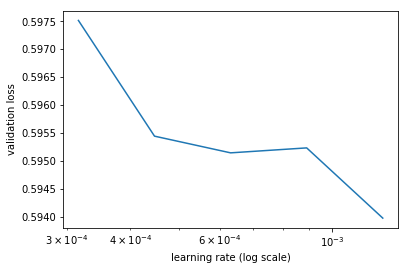

In [4]:
learner.lr_find()
learner.sched.plot()

In [4]:
lr = 6 * 1e-1
sargs = save_args('benchmark', PATH)

# 2 GPUS

num_workers = 1

In [7]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

epoch      trn_loss   val_loss   
    0      0.630409   0.6693    

 

         505317 function calls (463401 primitive calls) in 33.362 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      757    9.144    0.012    9.144    0.012 {method 'acquire' of '_thread.lock' objects}
      108    8.878    0.082    8.878    0.082 {built-in method numpy.core.multiarray.array}
       21    4.147    0.197    4.147    0.197 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.026    0.000    3.026    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.285    0.109    2.285    0.109 {method 'item' of 'torch._C._TensorBase' objects}
      184    1.596    0.009    1.596    0.009 {method 'cuda' of 'torch._C._TensorBase' objects}
     3570    1.575    0.000    1.575    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.838    0.032   19.220    0.739 dataloader.py:80(__iter__)
       24    0.332    0.014   10.791    0.450 dataloader.py:20(<listcomp>)
    

         505317 function calls (463401 primitive calls) in 33.362 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      757    9.144    0.012    9.144    0.012 {method 'acquire' of '_thread.lock' objects}
      108    8.878    0.082    8.878    0.082 {built-in method numpy.core.multiarray.array}
       21    4.147    0.197    4.147    0.197 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.026    0.000    3.026    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.285    0.109    2.285    0.109 {method 'item' of 'torch._C._TensorBase' objects}
      184    1.596    0.009    1.596    0.009 {method 'cuda' of 'torch._C._TensorBase' objects}
     3570    1.575    0.000    1.575    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}

In [8]:
learner.data.trn_dl.loader.num_workers = 2

In [9]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      0.697339   0.811913  

 

         503571 function calls (461680 primitive calls) in 22.576 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    5.325    0.254    5.325    0.254 {method 'run_backward' of 'torch._C._EngineBase' objects}
      681    5.056    0.007    5.056    0.007 {method 'acquire' of '_thread.lock' objects}
    10710    3.034    0.000    3.034    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      108    2.774    0.026    2.774    0.026 {built-in method numpy.core.multiarray.array}
       21    2.353    0.112    2.353    0.112 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.550    0.000    1.550    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.761    0.029    8.962    0.345 dataloader.py:80(__iter__)
      184    0.639    0.003    0.639    0.003 {method 'cuda' of 'torch._C._TensorBase' objects}
       24    0.182    0.008    3.595    0.150 dataloader.py:20(<listcomp>)
    

         503571 function calls (461680 primitive calls) in 22.576 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    5.325    0.254    5.325    0.254 {method 'run_backward' of 'torch._C._EngineBase' objects}
      681    5.056    0.007    5.056    0.007 {method 'acquire' of '_thread.lock' objects}
    10710    3.034    0.000    3.034    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      108    2.774    0.026    2.774    0.026 {built-in method numpy.core.multiarray.array}
       21    2.353    0.112    2.353    0.112 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.550    0.000    1.550    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}

In [10]:
learner.data.trn_dl.loader.num_workers = 4

In [11]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


         526677 function calls (484635 primitive calls) in 22.368 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    5.364    0.255    5.364    0.255 {method 'run_backward' of 'torch._C._EngineBase' objects}
      674    4.469    0.007    4.469    0.007 {method 'acquire' of '_thread.lock' objects}
    10710    3.055    0.000    3.055    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      108    3.031    0.028    3.031    0.028 {built-in method numpy.core.multiarray.array}
       21    2.339    0.111    2.339    0.111 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.548    0.000    1.548    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      184    0.693    0.004    0.693    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.444    0.017    8.350    0.321 dataloader.py:80(__iter__)
      532    0.228    0.000    0.228    0.000 {method '_write_file' of 'torch._

epoch      trn_loss   val_loss   
    0      0.702514   0.710848  

 

         526677 function calls (484635 primitive calls) in 22.368 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    5.364    0.255    5.364    0.255 {method 'run_backward' of 'torch._C._EngineBase' objects}
      674    4.469    0.007    4.469    0.007 {method 'acquire' of '_thread.lock' objects}
    10710    3.055    0.000    3.055    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      108    3.031    0.028    3.031    0.028 {built-in method numpy.core.multiarray.array}
       21    2.339    0.111    2.339    0.111 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.548    0.000    1.548    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      184    0.693    0.004    0.693    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.444    0.017    8.350    0.321 dataloader.py:80(__iter__)

In [12]:
learner.data.trn_dl.loader.num_workers = 8

In [13]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      0.694008   0.735685  

 

         507566 function calls (465650 primitive calls) in 26.674 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      108    6.676    0.062    6.676    0.062 {built-in method numpy.core.multiarray.array}
       21    4.967    0.237    4.967    0.237 {method 'run_backward' of 'torch._C._EngineBase' objects}
      714    4.450    0.006    4.450    0.006 {method 'acquire' of '_thread.lock' objects}
    10710    3.058    0.000    3.058    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.343    0.112    2.343    0.112 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.564    0.000    1.564    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      184    1.312    0.007    1.312    0.007 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.769    0.030   12.752    0.490 dataloader.py:80(__iter__)
       24    0.255    0.011    8.241    0.343 dataloader.py:20(<listcomp>)
    

         507566 function calls (465650 primitive calls) in 26.674 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      108    6.676    0.062    6.676    0.062 {built-in method numpy.core.multiarray.array}
       21    4.967    0.237    4.967    0.237 {method 'run_backward' of 'torch._C._EngineBase' objects}
      714    4.450    0.006    4.450    0.006 {method 'acquire' of '_thread.lock' objects}
    10710    3.058    0.000    3.058    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.343    0.112    2.343    0.112 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.564    0.000    1.564    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      184    1.312    0.007    1.312    0.007 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.769    0.030   12.752    0.490 dataloader.py:80(__iter__)
       24    0.255    0.011    8.241    0.343 dataloader.py:20(<listcomp>)

# Single GPU

In [6]:
lr = 6 * 1e-1
sargs = save_args('benchmark', PATH)

num_workers = 1

In [6]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

Validation:   3%|▎         | 1/32 [00:01<00:41,  1.34s/it]

         179574 function calls (168234 primitive calls) in 17.534 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10710    3.638    0.000    3.638    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    3.171    0.151    3.171    0.151 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    2.872    0.137    2.872    0.137 {method 'item' of 'torch._C._TensorBase' objects}
      617    2.426    0.004    2.426    0.004 {method 'acquire' of '_thread.lock' objects}
      108    1.614    0.015    1.614    0.015 {built-in method numpy.core.multiarray.array}
     3570    0.937    0.000    0.937    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.640    0.025    5.216    0.201 dataloader.py:80(__iter__)
      140    0.584    0.004    0.584    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
     1100    0.218    0.000    0.218    0.000 {built-in method conv2d}
     105

epoch      trn_loss   val_loss   
    0      1.862943   1.75093   

 

         179574 function calls (168234 primitive calls) in 17.534 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10710    3.638    0.000    3.638    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    3.171    0.151    3.171    0.151 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    2.872    0.137    2.872    0.137 {method 'item' of 'torch._C._TensorBase' objects}
      617    2.426    0.004    2.426    0.004 {method 'acquire' of '_thread.lock' objects}
      108    1.614    0.015    1.614    0.015 {built-in method numpy.core.multiarray.array}
     3570    0.937    0.000    0.937    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.640    0.025    5.216    0.201 dataloader.py:80(__iter__)
      140    0.584    0.004    0.584    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
     1100    0.218    0.000    0.218    0.000 {built-in method conv2d}

In [7]:
learner.data.trn_dl.loader.num_workers = 2

In [8]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      1.585299   1.795357  

 

         175048 function calls (163796 primitive calls) in 16.657 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    3.778    0.180    3.778    0.180 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.604    0.000    3.604    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.899    0.138    2.899    0.138 {method 'item' of 'torch._C._TensorBase' objects}
      478    2.428    0.005    2.428    0.005 {method 'acquire' of '_thread.lock' objects}
     3570    0.917    0.000    0.917    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      108    0.733    0.007    0.733    0.007 {built-in method numpy.core.multiarray.array}
       26    0.687    0.026    4.228    0.163 dataloader.py:80(__iter__)
      140    0.392    0.003    0.392    0.003 {method 'cuda' of 'torch._C._TensorBase' objects}
        1    0.251    0.251    0.251    0.251 {method 'close' of '_io.BufferedW

         175048 function calls (163796 primitive calls) in 16.657 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    3.778    0.180    3.778    0.180 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.604    0.000    3.604    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.899    0.138    2.899    0.138 {method 'item' of 'torch._C._TensorBase' objects}
      478    2.428    0.005    2.428    0.005 {method 'acquire' of '_thread.lock' objects}
     3570    0.917    0.000    0.917    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      108    0.733    0.007    0.733    0.007 {built-in method numpy.core.multiarray.array}
       26    0.687    0.026    4.228    0.163 dataloader.py:80(__iter__)
      140    0.392    0.003    0.392    0.003 {method 'cuda' of 'torch._C._TensorBase' objects}

In [9]:
learner.data.trn_dl.loader.num_workers = 4

In [10]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      1.532978   1.614508  

 

         220157 function calls (208605 primitive calls) in 17.420 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    3.717    0.177    3.717    0.177 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.581    0.000    3.581    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.907    0.138    2.907    0.138 {method 'item' of 'torch._C._TensorBase' objects}
      472    1.848    0.004    1.848    0.004 {method 'acquire' of '_thread.lock' objects}
      108    1.166    0.011    1.166    0.011 {built-in method numpy.core.multiarray.array}
     3570    0.931    0.000    0.931    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      798    0.650    0.001    0.650    0.001 {method '_write_file' of 'torch._C.CudaFloatStorageBase' objects}
        4    0.604    0.151    0.604    0.151 {built-in method io.open}
      140    0.578    0.004    0.578    0.004 {method 'cuda' of 

         220157 function calls (208605 primitive calls) in 17.420 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    3.717    0.177    3.717    0.177 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.581    0.000    3.581    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.907    0.138    2.907    0.138 {method 'item' of 'torch._C._TensorBase' objects}
      472    1.848    0.004    1.848    0.004 {method 'acquire' of '_thread.lock' objects}
      108    1.166    0.011    1.166    0.011 {built-in method numpy.core.multiarray.array}
     3570    0.931    0.000    0.931    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      798    0.650    0.001    0.650    0.001 {method '_write_file' of 'torch._C.CudaFloatStorageBase' objects}
        4    0.604    0.151    0.604    0.151 {built-in method io.open}
      140    0.578    0.004    0.578    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.378    0.015    3.953    0.152 dataloader.py:80(__iter__)
        1    0.147    0.147    0.147    0.147 {method 'cpu' of 'torch._C._TensorBase' objects}
        3    0.110    0.037    0.110    0.037 {method 'close' of '_io.BufferedWriter' objects}

In [11]:
learner.data.trn_dl.loader.num_workers = 8

In [12]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      1.432046   1.534369  

 

         245837 function calls (234095 primitive calls) in 19.936 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    3.649    0.174    3.649    0.174 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.601    0.000    3.601    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.924    0.139    2.924    0.139 {method 'item' of 'torch._C._TensorBase' objects}
      528    2.156    0.004    2.156    0.004 {method 'acquire' of '_thread.lock' objects}
      108    1.900    0.018    1.900    0.018 {built-in method numpy.core.multiarray.array}
     1064    1.440    0.001    1.440    0.001 {method '_write_file' of 'torch._C.CudaFloatStorageBase' objects}
      140    1.035    0.007    1.035    0.007 {method 'cuda' of 'torch._C._TensorBase' objects}
     3570    0.927    0.000    0.927    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
        5    0.666    0.133    0.666    

         245837 function calls (234095 primitive calls) in 19.936 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       21    3.649    0.174    3.649    0.174 {method 'run_backward' of 'torch._C._EngineBase' objects}
    10710    3.601    0.000    3.601    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.924    0.139    2.924    0.139 {method 'item' of 'torch._C._TensorBase' objects}
      528    2.156    0.004    2.156    0.004 {method 'acquire' of '_thread.lock' objects}
      108    1.900    0.018    1.900    0.018 {built-in method numpy.core.multiarray.array}
     1064    1.440    0.001    1.440    0.001 {method '_write_file' of 'torch._C.CudaFloatStorageBase' objects}
      140    1.035    0.007    1.035    0.007 {method 'cuda' of 'torch._C._TensorBase' objects}
     3570    0.927    0.000    0.927    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
        5    0.666    0.133    0.666    0.133 {built-in method io.open}
       26    0.405    0.016    5.556    0.214 dataloader.py:80(__iter__)
        1    0.152    0.152    0.152    0.152 {method 'cpu' of 'torch._C._TensorBase' objects}
     1100    0.124    0.000    0.124    0.000 {built-in method conv2d}
     1056    0.100    0.000    0.100    0.000 {built-in method batch_norm}

# 4 GPUS

num_workers = 1

In [7]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      0.618397   0.7154    

 

         706921 function calls (665035 primitive calls) in 42.450 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      108   13.620    0.126   13.620    0.126 {built-in method numpy.core.multiarray.array}
      917   12.222    0.013   12.222    0.013 {method 'acquire' of '_thread.lock' objects}
    10710    4.860    0.000    4.860    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      228    2.641    0.012    2.641    0.012 {method 'cuda' of 'torch._C._TensorBase' objects}
       21    2.499    0.119    2.499    0.119 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.985    0.095    1.985    0.095 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.457    0.000    1.457    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    1.230    0.047   29.123    1.120 dataloader.py:80(__iter__)
       24    0.441    0.018   16.696    0.696 dataloader.py:20(<listcomp>)
    

In [ ]:
         706921 function calls (665035 primitive calls) in 42.450 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      108   13.620    0.126   13.620    0.126 {built-in method numpy.core.multiarray.array}
      917   12.222    0.013   12.222    0.013 {method 'acquire' of '_thread.lock' objects}
    10710    4.860    0.000    4.860    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      228    2.641    0.012    2.641    0.012 {method 'cuda' of 'torch._C._TensorBase' objects}
       21    2.499    0.119    2.499    0.119 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.985    0.095    1.985    0.095 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.457    0.000    1.457    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    1.230    0.047   29.123    1.120 dataloader.py:80(__iter__)

In [8]:
learner.data.trn_dl.loader.num_workers = 2

In [9]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      0.639264   0.689126  

 

         729834 function calls (687798 primitive calls) in 30.320 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      878   12.039    0.014   12.039    0.014 {method 'acquire' of '_thread.lock' objects}
    10710    4.955    0.000    4.955    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      108    3.899    0.036    3.899    0.036 {built-in method numpy.core.multiarray.array}
       21    2.349    0.112    2.349    0.112 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.972    0.094    1.972    0.094 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.488    0.000    1.488    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      228    1.017    0.004    1.017    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.811    0.031   17.356    0.668 dataloader.py:80(__iter__)
       24    0.283    0.012    5.196    0.216 dataloader.py:20(<listcomp>)
    

In [ ]:
         729834 function calls (687798 primitive calls) in 30.320 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      878   12.039    0.014   12.039    0.014 {method 'acquire' of '_thread.lock' objects}
    10710    4.955    0.000    4.955    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      108    3.899    0.036    3.899    0.036 {built-in method numpy.core.multiarray.array}
       21    2.349    0.112    2.349    0.112 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.972    0.094    1.972    0.094 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.488    0.000    1.488    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      228    1.017    0.004    1.017    0.004 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.811    0.031   17.356    0.668 dataloader.py:80(__iter__)

In [10]:
learner.data.trn_dl.loader.num_workers = 4

In [11]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


         708260 function calls (666375 primitive calls) in 26.118 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      852    6.420    0.008    6.420    0.008 {method 'acquire' of '_thread.lock' objects}
      108    5.477    0.051    5.477    0.051 {built-in method numpy.core.multiarray.array}
    10710    4.989    0.000    4.989    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.283    0.109    2.283    0.109 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.978    0.094    1.978    0.094 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.497    0.000    1.497    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      228    1.294    0.006    1.294    0.006 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.607    0.023   13.315    0.512 dataloader.py:80(__iter__)
       24    0.322    0.013    7.090    0.295 dataloader.py:20(<listcomp>)
    

epoch      trn_loss   val_loss   
    0      0.65568    0.716875  

 

In [ ]:
         708260 function calls (666375 primitive calls) in 26.118 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      852    6.420    0.008    6.420    0.008 {method 'acquire' of '_thread.lock' objects}
      108    5.477    0.051    5.477    0.051 {built-in method numpy.core.multiarray.array}
    10710    4.989    0.000    4.989    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.283    0.109    2.283    0.109 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.978    0.094    1.978    0.094 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.497    0.000    1.497    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
      228    1.294    0.006    1.294    0.006 {method 'cuda' of 'torch._C._TensorBase' objects}
       26    0.607    0.023   13.315    0.512 dataloader.py:80(__iter__)

In [12]:
learner.data.trn_dl.loader.num_workers = 8

In [13]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      0.638396   0.682923  

 

         776368 function calls (734029 primitive calls) in 31.247 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      108    7.224    0.067    7.224    0.067 {built-in method numpy.core.multiarray.array}
      874    7.166    0.008    7.166    0.008 {method 'acquire' of '_thread.lock' objects}
    10710    5.067    0.000    5.067    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      228    2.261    0.010    2.261    0.010 {method 'cuda' of 'torch._C._TensorBase' objects}
       21    2.100    0.100    2.100    0.100 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.999    0.095    1.999    0.095 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.501    0.000    1.501    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.910    0.035   16.828    0.647 dataloader.py:80(__iter__)
        5    0.584    0.117    0.584    0.117 {built-in method io.open}
     10

In [ ]:
         776368 function calls (734029 primitive calls) in 31.247 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      108    7.224    0.067    7.224    0.067 {built-in method numpy.core.multiarray.array}
      874    7.166    0.008    7.166    0.008 {method 'acquire' of '_thread.lock' objects}
    10710    5.067    0.000    5.067    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
      228    2.261    0.010    2.261    0.010 {method 'cuda' of 'torch._C._TensorBase' objects}
       21    2.100    0.100    2.100    0.100 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.999    0.095    1.999    0.095 {method 'item' of 'torch._C._TensorBase' objects}
     3570    1.501    0.000    1.501    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.910    0.035   16.828    0.647 dataloader.py:80(__iter__)
        5    0.584    0.117    0.584    0.117 {built-in method io.open}
     1064    0.505    0.000    0.505    0.000 {method '_write_file' of 'torch._C.CudaFloatStorageBase' objects}
       24    0.368    0.015    9.846    0.410 dataloader.py:20(<listcomp>)
        4    0.257    0.064    0.257    0.064 {method 'close' of '_io.BufferedWriter' objects}
       44    0.178    0.004    0.178    0.004 {built-in method torch._C._broadcast_coalesced}
        1    0.148    0.148    0.148    0.148 {method 'cpu' of 'torch._C._TensorBase' objects}
    54666    0.118    0.000    0.155    0.000 module.py:534(__setattr__)

In [14]:
learner.data.trn_dl.loader.num_workers = 32

In [15]:
%load_ext line_profiler
%prun learner.fit(lr, 1, cycle_len=1, use_clr_beta=(10, 13.68, 0.95, 0.85), wds=1e-4, **sargs)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


epoch      trn_loss   val_loss   
    0      0.652695   0.747536  

 

         711015 function calls (669129 primitive calls) in 37.247 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      973   14.463    0.015   14.463    0.015 {method 'acquire' of '_thread.lock' objects}
      108    7.310    0.068    7.310    0.068 {built-in method numpy.core.multiarray.array}
    10710    5.069    0.000    5.069    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.554    0.122    2.554    0.122 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.983    0.094    1.983    0.094 {method 'item' of 'torch._C._TensorBase' objects}
      228    1.799    0.008    1.799    0.008 {method 'cuda' of 'torch._C._TensorBase' objects}
     3570    1.532    0.000    1.532    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.996    0.038   24.203    0.931 dataloader.py:80(__iter__)
       24    0.370    0.015    9.476    0.395 dataloader.py:20(<listcomp>)
    

In [ ]:
         711015 function calls (669129 primitive calls) in 37.247 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      973   14.463    0.015   14.463    0.015 {method 'acquire' of '_thread.lock' objects}
      108    7.310    0.068    7.310    0.068 {built-in method numpy.core.multiarray.array}
    10710    5.069    0.000    5.069    0.000 {method 'add_' of 'torch._C._TensorBase' objects}
       21    2.554    0.122    2.554    0.122 {method 'run_backward' of 'torch._C._EngineBase' objects}
       21    1.983    0.094    1.983    0.094 {method 'item' of 'torch._C._TensorBase' objects}
      228    1.799    0.008    1.799    0.008 {method 'cuda' of 'torch._C._TensorBase' objects}
     3570    1.532    0.000    1.532    0.000 {method 'mul_' of 'torch._C._TensorBase' objects}
       26    0.996    0.038   24.203    0.931 dataloader.py:80(__iter__)
       24    0.370    0.015    9.476    0.395 dataloader.py:20(<listcomp>)
    54666    0.220    0.000    0.254    0.000 module.py:534(__setattr__)
        1    0.143    0.143    0.143    0.143 {method 'cpu' of 'torch._C._TensorBase' objects}
       44    0.125    0.003    0.125    0.003 {built-in method torch._C._broadcast_coalesced}
      266    0.109    0.000    0.109    0.000 {method '_write_file' of 'torch._C.CudaFloatStorageBase' objects}
       22    0.070    0.003    0.544    0.025 replicate.py:4(replicate)